# 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [63]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')

In [64]:
df.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


### For each group, is there a significant difference between time 1 and time 2?

In [12]:
df.groupby(['group']).agg(['count'])

,patient,t1,t2
,count,count,count
group,,,
1,200,200,200
2,100,100,100
3,100,100,100


In [65]:
df = df.assign(diff = df.t2 - df.t1)
df.head()

,group,patient,t1,t2,diff
0,1,1-1,4226,4497,271
1,1,1-2,5731,5665,-66
2,1,1-3,3912,4505,593
3,1,1-4,4811,6472,1661
4,1,1-5,5128,4710,-418


In [66]:
group_1 = df.loc[df.group == 1]
group_2 = df.loc[df.group == 2]
group_3 = df.loc[df.group == 3]

(array([ 1.,  0.,  0.,  6.,  5., 32., 33., 15.,  6.,  2.]),
 array([-1827., -1536., -1245.,  -954.,  -663.,  -372.,   -81.,   210.,
          501.,   792.,  1083.]),
 <a list of 10 Patch objects>)

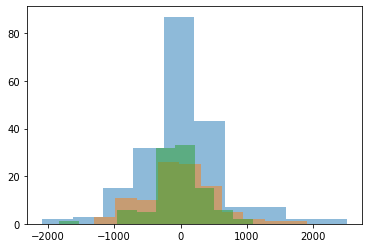

In [58]:
plt.hist(group_1.t2 - group_1.t1, alpha=.5)
plt.hist(group_2.t2 - group_2.t1, alpha=.5)
plt.hist(group_3.t2 - group_3.t1, alpha=.5)

(array([ 1.,  0.,  0.,  6.,  5., 32., 33., 15.,  6.,  2.]),
 array([-1827., -1536., -1245.,  -954.,  -663.,  -372.,   -81.,   210.,
          501.,   792.,  1083.]),
 <a list of 10 Patch objects>)

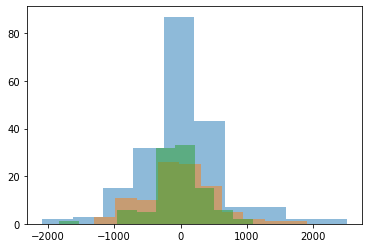

In [69]:
plt.hist(group_1['diff'], alpha=.5)
plt.hist(group_2['diff'], alpha=.5)
plt.hist(group_3['diff'], alpha=.5)

In [71]:
print('group 1 normality:', stats.shapiro(group_1['diff']))
print('group 2 normality:', stats.shapiro(group_2['diff']))
print('group 3 normality:', stats.shapiro(group_3['diff']))

group 1 normality: (0.9512620568275452, 2.5016638574015815e-06)
group 2 normality: (0.9814630746841431, 0.17255757749080658)
group 3 normality: (0.9373377561569214, 0.00013314159878063947)


In [74]:
print('Sig diff test group1', stats.ttest_rel(group_1.t1, group_1.t2))
print('Sig diff test group2', stats.ttest_rel(group_2.t1, group_2.t2))
print('Sig diff test group3', stats.ttest_rel(group_3.t1, group_3.t2))
print('with very high p-values and relatively low t-statistics, there is no significant reason to reject the null hypothesis that the means are the same between time 1 and time 2 in any group')

Sig diff test group1 Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)
Sig diff test group2 Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)
Sig diff test group3 Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)
with very high p-values and relatively low t-statistics, there is no significant reason to reject the null hypothesis that the means are the same between time 1 and time 2 in any group


### Is there a significant difference in the mean of all groups at time 2?

In [78]:
stats.f_oneway(group_1.t2, group_2.t2, group_3.t2)
print('With a statistically significant p-value, we can reject the null hypothesis that the difference between group means is zero, and assume there is a significant difference.')

With a statistically significant p-value, we can reject the null hypothesis that the difference between group means is zero, and assume there is a significant difference.


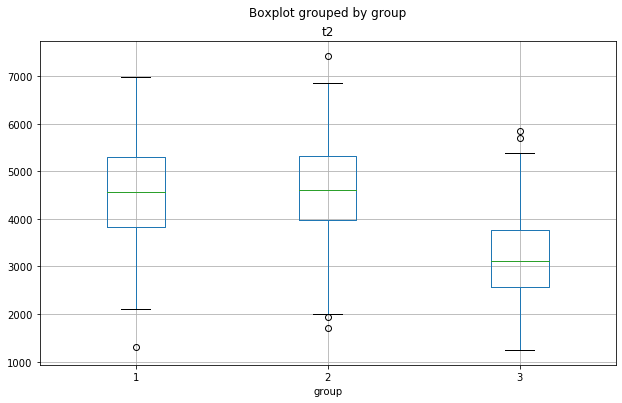

In [88]:
df.boxplot('t2', by='group', figsize=(10, 6))

In [83]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['t2'], groups = df['group'], alpha=.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True


# All Done